# Q1

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_ = 0.5
N = 1000

# Decay Simulation for p = lambda * dt
def decay_simulation_constant(n, dt):
    decayed = []
    time = []
    prob = lambda_ * dt
    s = 0
    while n > 0:
        
        decayed.append(n)
        time.append(s * dt)
        j = 0
        for _ in range(n):
            
            
            if np.random.rand() < prob:
                n -= 1  # Simulating decay
            
        s += 1
            
    return time, decayed

# Decay Simulation for p = (lambda * dt) / t
def decay_simulation_time_dependent(n, dt):
    decayed = []
    time = []
    s = 1 # Avoid t=0 to prevent division by zero
    while n > 0:
        j = 0
        decayed.append(n)
        time.append(s * dt)
        
        for _ in range(n):  
            prob = (lambda_ * dt) / (s * dt)
            if np.random.rand() < prob:
                n -= 1  # Simulating decay
        #n += j
        s += 1
    return time, decayed

# Run Simulations
time_a, constant_decay = decay_simulation_constant(N, dt = 0.01)
time_b, time_dependent_decay = decay_simulation_time_dependent(N, dt = 1)


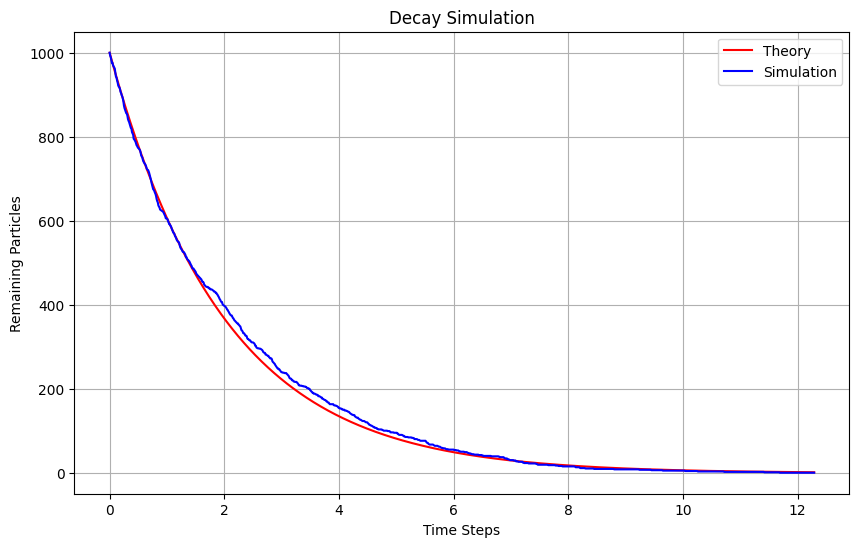

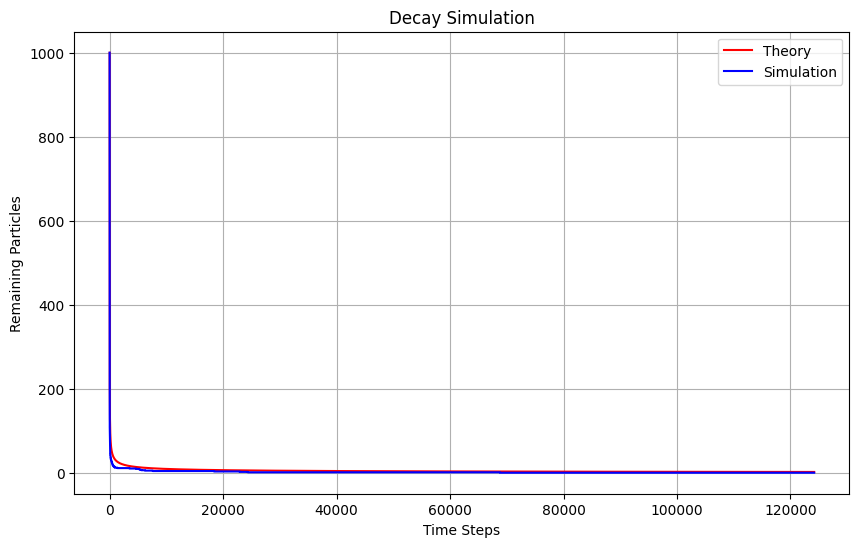

In [50]:
time_a = np.array(time_a)
time_b = np.array(time_b)

# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(time_a, N*np.exp(-lambda_*time_a), color = "r", label="Theory")
plt.plot(time_a, constant_decay, label='Simulation', color='blue')
plt.xlabel('Time Steps')
plt.ylabel('Remaining Particles')
plt.title('Decay Simulation')
plt.legend()
plt.grid()
plt.show()

# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(time_b, N * time_b ** (-lambda_), color = "r", label="Theory")
plt.plot(time_b, time_dependent_decay, label='Simulation', color='blue')
plt.xlabel('Time Steps')
plt.ylabel('Remaining Particles')
plt.title('Decay Simulation')
plt.legend()
plt.grid()
plt.show()

# Q2

N = 100: Estimated Pi = 3.48
N = 1000: Estimated Pi = 3.156
N = 10000: Estimated Pi = 3.1592
N = 100000: Estimated Pi = 3.14132


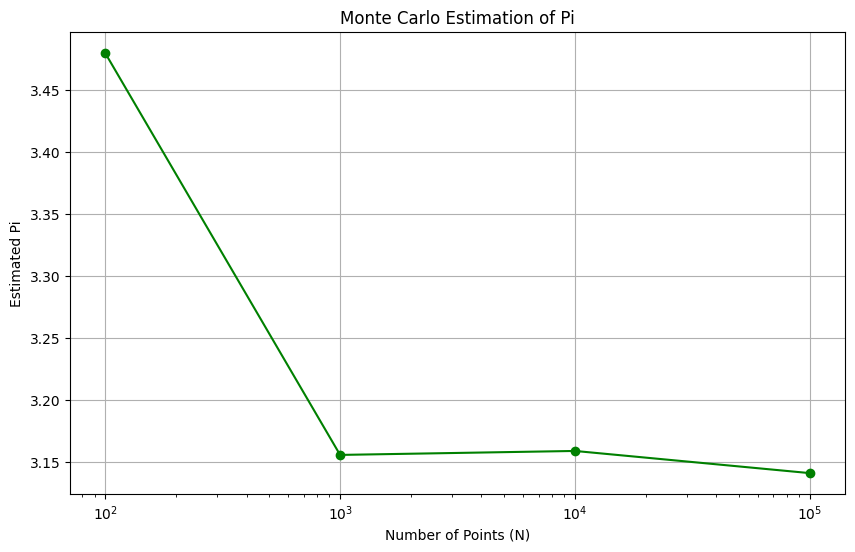

In [51]:
def estimate_pi(num_points):
    inside_circle = 0

    x_coords = np.random.uniform(-1, 1, num_points)
    y_coords = np.random.uniform(-1, 1, num_points)

    for x, y in zip(x_coords, y_coords):
        if x**2 + y**2 <= 1:
            inside_circle += 1

    pi_estimate = (inside_circle / num_points) * 4
    return pi_estimate

# Run Monte Carlo Simulation for Various N Values
n_values = [100, 1000, 10000, 100000]
pi_estimates = [estimate_pi(n) for n in n_values]

# Print Results
for n, pi_estimate in zip(n_values, pi_estimates):
    print(f"N = {n}: Estimated Pi = {pi_estimate}")

# Plot Monte Carlo Results
plt.figure(figsize=(10, 6))
plt.plot(n_values, pi_estimates, marker='o', linestyle='-', color='green')
plt.xscale('log')
plt.xlabel('Number of Points (N)')
plt.ylabel('Estimated Pi')
plt.title('Monte Carlo Estimation of Pi')
plt.grid()
plt.show()


# Q3

In [124]:
# Numerical Integration for <v_z^2>
def integrand(vx, vy, vz, beta_m):
    prefactor = (beta_m / (2 * np.pi))**(3/2)
    v_squared = vx**2 + vy**2 + vz**2
    return vz**2 * prefactor * np.exp(-beta_m * v_squared / 2)

def compute_vz2(beta_m, num_samples=1000000):
    samples = np.random.uniform(0, np.sqrt(1/beta_m), (num_samples, 3))
    vz2_values = samples[:, 2]**2
    weights = (beta_m / (2 * np.pi))**(3/2) * np.exp(-beta_m * np.sum(samples**2, axis=1) / 2)
    return np.mean(vz2_values * weights)

# Parameters
beta_m = 2
vz2_result = compute_vz2(beta_m)

print(f"Numerical result for <v_z^2>: {vz2_result}")
print(f"Analytical result for <v_z^2>: {1/(2*np.pi**3)}")

Numerical result for <v_z^2>: 0.01637685805426312
Analytical result for <v_z^2>: 0.016125767216599748
